/home/ericbuehler/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of training batches:  1943 batch size=  16 total:  31088
Number of test batches:  7771 batch size=  1 total:  7771
TOTAL images (account for full batches):  38859
(256, 256)


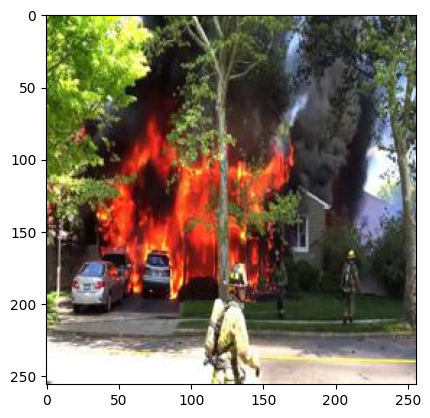

(256, 256)


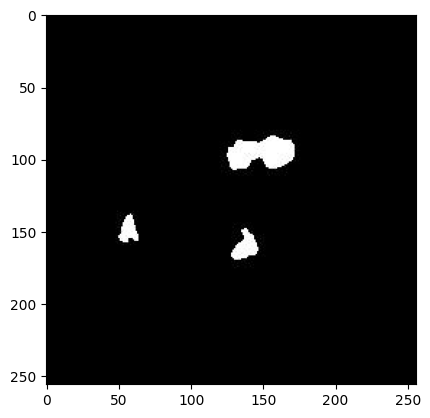

256 256


In [1]:
# -*- coding: utf-8 -*-

import os
import torchvision.transforms as T
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
import PIL.Image as Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
modelname="4_8_23_m1"

prefix_models="./models/"+modelname+"/"

if not os.path.exists(prefix_models):
    os.makedirs(prefix_models)

to_pil = transforms.ToPILImage()

In [ ]:
class ImageDataset(Dataset):
    def __init__(self,dir,images,transform):
        self.images=list(images)
        self.transform=transform
        self.dir=dir
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self,index):
        im_pil_x=Image.open(self.dir+self.images[index][0]).convert('RGB')

        image_x=self.transform(im_pil_x)

        if self.images[index][1] is not None:
            im_pil_y = Image.open(self.dir+self.images[index][1]).convert('RGB')

            image_y=self.transform(im_pil_y)
        else:
            image_y=torch.zeros(image_x.shape)

        return (image_x, image_y)

data_dir = './dataset'
batchSize = 16

def load_split_train_test(data_dir, valid_size = .2):
    transform = transforms.Compose([transforms.ToTensor()])
    
    images = []
    images.extend(map(lambda x: ("/Fire/"+x[0], "/Mask/Fire/"+x[1]), list(zip(os.listdir(data_dir+"/Fire/"), os.listdir(data_dir+"/Mask/Fire/")))))
    images.extend(map(lambda x: ("/Not_Fire/"+x, None), os.listdir(data_dir+"/Not_Fire/")))
    
    train,test =train_test_split(images,test_size=valid_size)
    train_data=ImageDataset(data_dir, train, transform)
    test_data=ImageDataset(data_dir, test, transform)
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=batchSize)

    testloader = torch.utils.data.DataLoader(test_data, batch_size=1)
    return trainloader, testloader

dataloader, testloader = load_split_train_test(data_dir)
print("Number of training batches: ", len(dataloader), "batch size= ", batchSize, "total: ",len(dataloader)*batchSize)
print("Number of test batches: ", len(testloader), "batch size= ", 1, "total: ",len(testloader))

print("TOTAL images (account for full batches): ", len(dataloader)*batchSize+len(testloader) )

In [ ]:
it = iter(dataloader)
item=next(it)
image = to_pil(item[0][0])
print(image.size)
plt.imshow(image)
plt.show()
image = to_pil(item[1][0])
print(image.size)
plt.imshow(image)
plt.show()

In [ ]:
im_resx = image.size[0]
im_resy = image.size[1]
print(im_resx, im_resy)